# **An Exploratory Data Analysis of the NBA in the 2022-23 Season**
## By Koops0


### Introduction
The National Basketball Association, commonly known as the NBA, had a very interesting 2022-23 season. The fact that the Sacramento Kings made the postseason and the Miami Heat having one of the greatest playoff runs of all time is not something one had on their prediction before the season. But, there are still some questions about this season that should be addressed, even after it ended with the Denver Nuggets winning against the Heat. In this exploratory data analysis, there will be a look at the 2022-2023 regular season and how a player or team performed. The dataset that I am using is the "NBA Player Salaries (2022-23 Season)" dataset by Jamie Welsh on Kaggle [1].

While looking at the dataset, I did have a few questions written down that I wanted to address by doing the EDA. These are the following questions:

1. Considering the amount of money players are getting now, with a big story this offseason being that Jaylen Brown signed the richest contract in the history of the NBA [2], is there any positive correlation between a player's salary and their performance based on five specific advanced categories?
2. Which team was the most efficient in that season based on their shooting? Is there a correlation to how they performed overall(i.e. the Denver Nuggets had the most efficient shooting)?
3. Does position really matter when it comes to average salary and performance? This particular question is the most interesting one. 

All three questions will be analyzed to solve a bigger question: *What is the best scenario to potentially achieve the maximum amount of success if one gets drafted?* Many young children want to be in the NBA and become successful. By doing this specific question by analyzing the three other questions, I want to see if specific archetypes that provide the highest ceiling no longer exists in the game, so that everyone can have a good chance of doing that.

### Methods
#### Data Collection

As explained in the introduction, I am using a dataset on Kaggle that has every NBA player that played in the 2022-23 season.

In [1]:
#PYTHON LIBRARY IMPORTS
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading Data
nba_data = pd.read_csv('nba_salaries.csv')
nba_data

,Player Name,Salary,Position,Age,Team,GP,GS,MP,FG,FGA,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Stephen Curry,48070014,PG,34,GSW,56,56,34.7,10.0,20.2,...,12.5,31.0,5.8,2.0,7.8,0.192,7.5,0.1,7.5,4.7
1,John Wall,47345760,PG,32,LAC,34,3,22.2,4.1,9.9,...,17.1,27.0,-0.4,0.7,0.3,0.020,-0.8,-0.4,-1.2,0.1
2,Russell Westbrook,47080179,PG,34,LAL/LAC,73,24,29.1,5.9,13.6,...,18.4,27.7,-0.6,2.6,1.9,0.044,0.3,-0.1,0.2,1.2
3,LeBron James,44474988,PF,38,LAL,55,54,35.5,11.1,22.2,...,11.6,33.3,3.2,2.4,5.6,0.138,5.5,0.6,6.1,4.0
4,Kevin Durant,44119845,PF,34,BRK/PHO,47,47,35.6,10.3,18.3,...,13.4,30.7,4.7,2.1,6.8,0.194,6.0,1.2,7.1,3.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,Justin Minaya,35096,SF,23,POR,4,0,22.3,1.8,5.8,...,14.6,13.4,-0.2,0.1,-0.1,-0.067,-7.2,-1.9,-9.0,-0.2
463,Kobi Simmons,32795,SG,25,CHO,5,0,5.6,0.2,1.2,...,12.7,11.8,0.0,0.0,0.0,0.019,-1.0,0.1,-0.9,0.0
464,Gabe York,32171,SG,29,IND,3,0,18.7,2.7,7.0,...,0.0,16.4,0.1,0.0,0.1,0.091,-1.7,-1.8,-3.5,0.0
465,RaiQuan Gray,5849,PF,23,BRK,1,0,35.0,6.0,12.0,...,23.7,21.4,0.0,0.0,0.1,0.106,-0.6,-1.4,-2.0,0.0


#### Data Cleanup

Now that the data has been read, I am going to simplify it. To start, I will remove every player that has a null value somewhere, as well as people who play 15 games or fewer. I will also be omitting players in this dataset that either have dual positions in their dataset or players that were on two teams later. Question 1 is based on individual performance though, so I will include the players that will be exempt for Questions 2 and 3 here. 

Then, I will remove columns that are unnecessary for this analysis. These 5 columns under the columns list are related to player performance:

TS%: True Shooting Percentage - Measures overall shot efficiency. FG% includes 2 and 3 point shots, while TS% includes free throws as well. [3]

WS: Win Shares - Amount of contribution to a team's success both offensively and defensively. [4]

WS/48: Win Shares per 48 Minutes - Amount of contribution to a team's success if they played all 48 minutes, a per game value. [4]

BPM: Box Plus Minus - Amount of contribution to a team's success based only on box score. 0 is the average. [5]

VORP: Value over Replacement Player - Converts BPM to a player's contribution vs a replacement player that has a BPM of -2. [5]

After that, I will divide the salary by 100000, with the result rounded to 3 decimal places. The resulting dataset should have 380 players, versus the 467 players from before.

In [3]:
#Remove players that have NaN values
nba_data = nba_data.dropna(axis=0)

#Simplify columns by removing most of the irrelevant ones, no need to rename them
columns = ['Player Name', 'Salary', 'Position', 'Team', 'GP', 'TS%', 'WS', 'WS/48', 'BPM', 'VORP']
nba_data = nba_data[columns]
nba_data = nba_data[nba_data['GP'] >= 16]

#Make salary in the 100000s, round to 3 decimal places. Must use loc here, or it will throw a warning
nba_data.loc[:,'Salary'] = round(nba_data['Salary']/100000,3)

nba_data

,Player Name,Salary,Position,Team,GP,TS%,WS,WS/48,BPM,VORP
0,Stephen Curry,480.700,PG,GSW,56,0.656,7.8,0.192,7.5,4.7
1,John Wall,473.458,PG,LAC,34,0.498,0.3,0.020,-1.2,0.1
2,Russell Westbrook,470.802,PG,LAL/LAC,73,0.513,1.9,0.044,0.2,1.2
3,LeBron James,444.750,PF,LAL,55,0.583,5.6,0.138,6.1,4.0
4,Kevin Durant,441.198,PF,BRK/PHO,47,0.677,6.8,0.194,7.1,3.9
...,...,...,...,...,...,...,...,...,...,...
423,Julian Champagnie,5.089,SF,SAS/PHI,17,0.600,0.4,0.061,-3.3,-0.1
424,Jeff Dowtin,5.089,PG,TOR,25,0.500,0.4,0.076,-1.9,0.0
426,Johnny Juzang,5.089,SG,UTA,18,0.411,-0.2,-0.032,-6.5,-0.3
427,John Butler,5.030,C,POR,19,0.411,0.0,0.001,-6.2,-0.2


### Analysis
Let's explore the distribution of our dataset with histograms and the summary table with .describe(). All of these metrics are right-skewed.

Starting off with salary, many earn less than $10 million per year, with a mean of $9.86 million and a median of $5 million.

For TS%, most hover around 53-60%, with the mean and median being 57.1%, but this metric is slightly right-skewed.

Players usually have around 0-4 win shares, with a mean of 2.77 and a median of 2.1.

Per 48 minutes, win shares range between 0.0537 and 0.127 for most players, with a mean of 0.0904 and a median of 0.088.

Most players have a BPM between -2.8 and 0.7, with the mean being -0.892 and the median being -1.1, which is disappointing.

For most, their VORP is between -0.1 and 1, with a mean of 0.653 and a median of 0.2.

Based on the preliminary histogram of the dataset, I think salary has a positive correlation with all of the performance statistics. In terms of how strong that correlation is, salary could have a really strong correlation with VORP and Win Shares, but a weaker one with the rest.

,Salary,TS%,WS,WS/48,BPM,VORP
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,98.668039,0.571345,2.774474,0.090389,-0.891579,0.653684
std,111.316645,0.059457,2.537030,0.055759,2.870813,1.263267
min,3.861000,0.359000,-1.600000,-0.114000,-9.600000,-1.300000
25%,21.985000,0.533000,0.800000,0.053750,-2.800000,-0.100000
50%,50.048000,0.571000,2.100000,0.088000,-1.100000,0.200000
75%,129.700000,0.607000,4.200000,0.126500,0.700000,1.000000
max,480.700000,0.780000,12.600000,0.277000,9.200000,6.400000


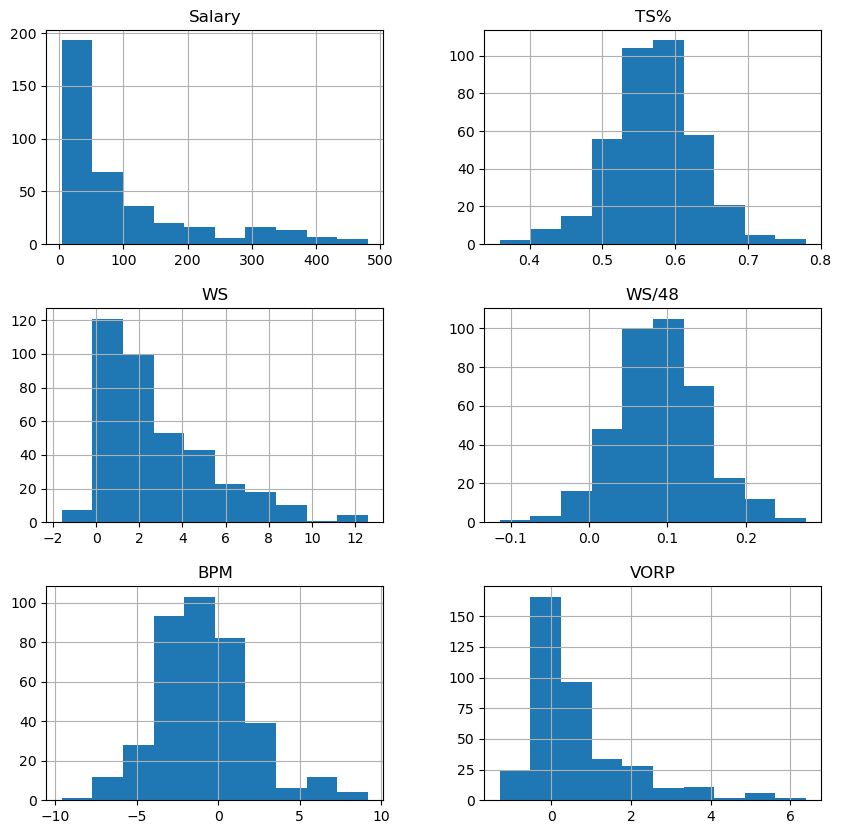

In [4]:
#Histogram of every numerical column
histo_data = nba_data.drop(columns=['GP'])
histo = histo_data.hist(bins=10, figsize=(10,10))

#Summary Statistics
histo_data.describe()

#### Salary and TS%

I will begin Question 1 by checking salary and true shooting percentage. I will be using a regression plot that will contain a line of best fit. For Figure 1, I will let the x axis = the amount of salary in hundred thousands and the y axis = the true shooting percentage.

I will also call pandas' .corr() fn, which gives a correlation between x and y in the format, x.corr(y). The correlations will be explained in the discussion.

Pearson Correlation Coefficient:  0.2132


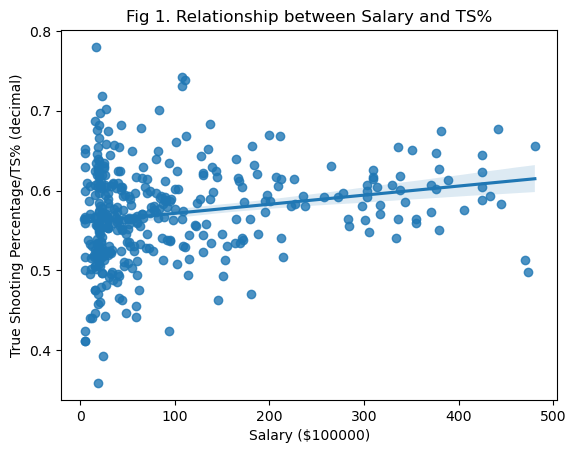

In [5]:
#Plot
ts_plot = sns.regplot(x='Salary', y='TS%', data=nba_data)
ts_plot = ts_plot.set(title='Fig 1. Relationship between Salary and TS%', xlabel='Salary ($100000)', ylabel='True Shooting Percentage/TS% (decimal)')

#Get linear regression coefficient r, round to 4 decimal places, .corr() gives r value, [x].corr([y]), taken from pandas documentation
r = round(nba_data['Salary'].corr(nba_data['TS%']),4)
print('Pearson Correlation Coefficient: ', r)

plt.show(ts_plot)

#### Salary and WS

For Figure 2, I will let the x axis = the amount of salary in hundred thousands and the y axis = win shares.

Pearson Correlation Coefficient:  0.5991


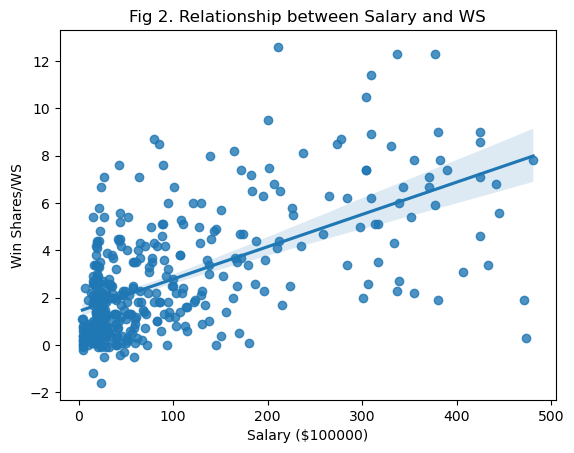

In [6]:
#Plot
ws_plot = sns.regplot(x='Salary', y='WS', data=nba_data)
ws_plot = ws_plot.set(title='Fig 2. Relationship between Salary and WS', xlabel='Salary ($100000)', ylabel='Win Shares/WS')

#Get r, round to 4 decimal places
r = round(nba_data['Salary'].corr(nba_data['WS']),4)
print('Pearson Correlation Coefficient: ', r)

plt.show(ws_plot)

#### Salary and WS/48

For Figure 3, I will let the x axis = the amount of salary in hundred thousands and the y axis = win shares per 48 minutes.

Pearson Correlation Coefficient:  0.3772


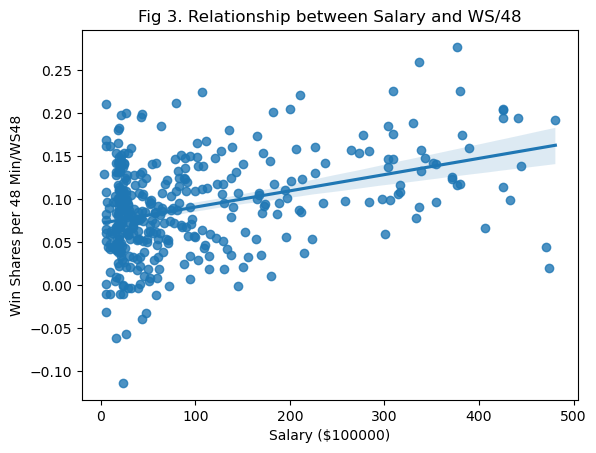

In [7]:
#Plot
ws48_plot = sns.regplot(x='Salary', y='WS/48', data=nba_data)
ws48_plot = ws48_plot.set(title='Fig 3. Relationship between Salary and WS/48', xlabel='Salary ($100000)', ylabel='Win Shares per 48 Min/WS48')

#Get r, round to 4 decimal places
r = round(nba_data['Salary'].corr(nba_data['WS/48']),4)
print('Pearson Correlation Coefficient: ', r)

plt.show(ws48_plot)

#### Salary and BPM

For Figure 4, I will let the x axis = the amount of salary in hundred thousands and the y axis = box plus minus.

Pearson Correlation Coefficient:  0.6047


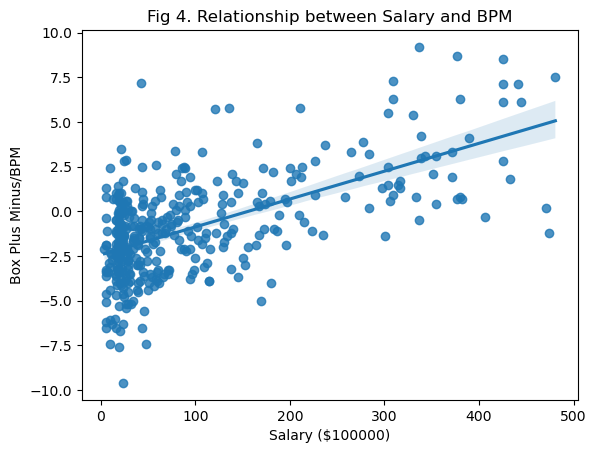

In [8]:
#Plot
bpm_plot = sns.regplot(x='Salary', y='BPM', data=nba_data)
bpm_plot = bpm_plot.set(title='Fig 4. Relationship between Salary and BPM', xlabel='Salary ($100000)', ylabel='Box Plus Minus/BPM')

#Get r, round to 4 decimal places
r = round(nba_data['Salary'].corr(nba_data['BPM']),4)
print('Pearson Correlation Coefficient: ', r)

plt.show(bpm_plot)

#### Salary and VORP

For Figure 5, I will let the x axis = the amount of salary in hundred thousands and the y axis = value over replacement player.

Pearson Correlation Coefficient:  0.6745


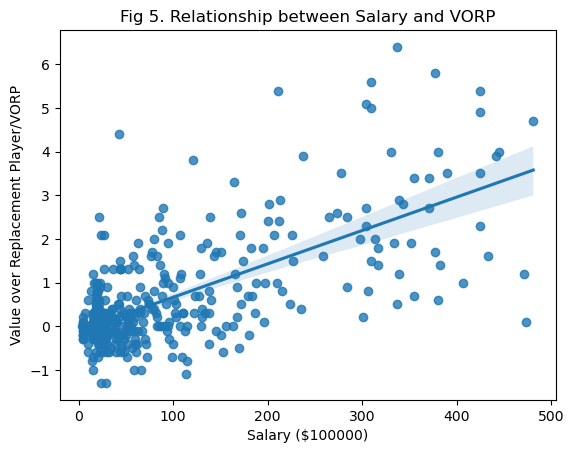

In [9]:
#Plot
vorp_plot = sns.regplot(x='Salary', y='VORP', data=nba_data)
vorp_plot = vorp_plot.set(title='Fig 5. Relationship between Salary and VORP', xlabel='Salary ($100000)', ylabel='Value over Replacement Player/VORP')

#Get r, round to 4 decimal places
r = round(nba_data['Salary'].corr(nba_data['VORP']),4)
print('Pearson Correlation Coefficient: ', r)

plt.show(vorp_plot)

#### Most Efficient Team
Now, I will find the most efficient team by finding the average true shooting percentage of each team. In my opinion, I specifially chose this statistic as the other four focus more on individual performance, while TS% is effective on both team and player performance. To do this, I'll use groupby to group everyone who played only for that team and then call .mean to get the mean. If a player has been on two or more teams, they will not be counted. A tilde(~) has to be used as a false, and not the usual ! for str.contains() to work.

In [10]:
#Use groupby to sort each player by team, get mean true shooting percentage.
grouped_teams = nba_data["TS%"].groupby(nba_data["Team"]).mean()

#Remove all teams with a '/' in their team name by using str.contains
#!x doesn't work here, so we need to use tilde to make it false
grouped_teams = grouped_teams[~grouped_teams.index.str.contains('/')]

With grouped_teams having exactly 30 values, it is time to graph Figure 6, which is their teams (x) and average TS% (y). I did a different colour for each team to enhance presentation. I also have to change the range of y so that it starts at 0.5, since every team's TS% is above 50%.

Highest TS% - 0.618
Lowest TS% - 0.525


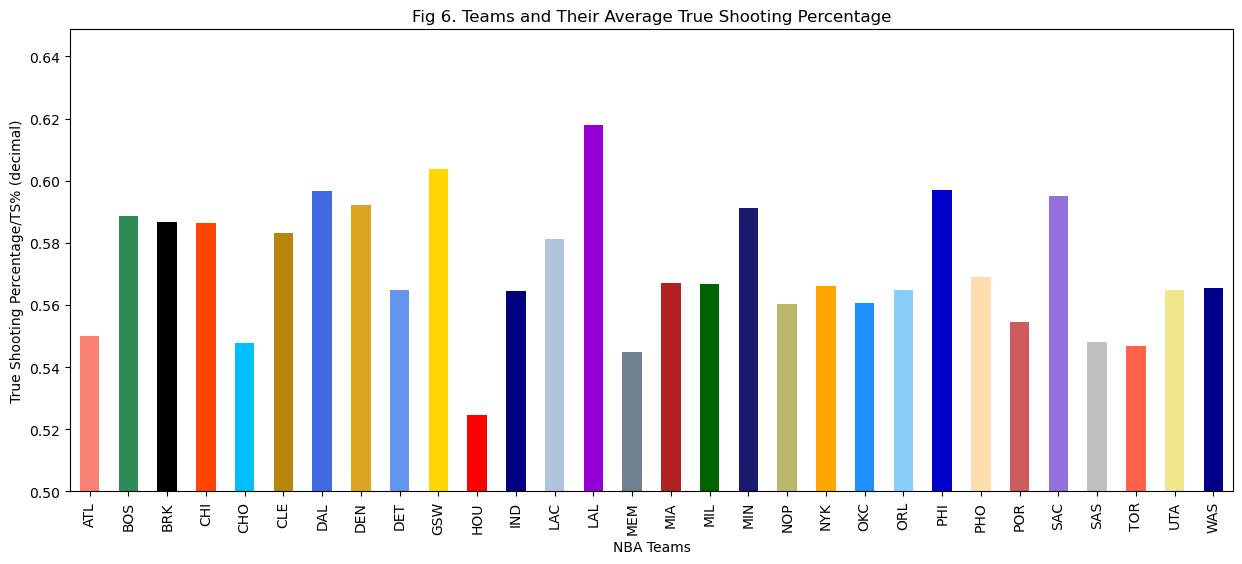

In [11]:
#Create colours list, 1 for every team, inspired by team colours
colours = ['salmon','seagreen','black','orangered','deepskyblue','darkgoldenrod','royalblue','goldenrod','cornflowerblue','gold',
           'red','navy','lightsteelblue','darkviolet','slategray','firebrick','darkgreen','midnightblue','darkkhaki','orange','dodgerblue',
           'lightskyblue','mediumblue','navajowhite','indianred','mediumpurple','silver','tomato','khaki','darkblue']
#Bar Plot
grouped_plot = grouped_teams.plot.bar(color=colours, figsize=(15,6), title='Fig 6. Teams and Their Average True Shooting Percentage')
plt.ylabel("True Shooting Percentage/TS% (decimal)")
plt.xlabel('NBA Teams')

#All teams' average TS% is above .500, need to set range so that y starts at .500
plt.ylim(0.5)

#Print TS%
print(f'Highest TS% - {round(grouped_teams.max(),3)}')
print(f'Lowest TS% - {round(grouped_teams.min(),3)}')

plt.show(grouped_plot)

#### Best Position
The final question that I wanted to do is check if position matters when it comes to average performance and salary. I'll start by doing salary first. Like the teams, I'm removing players that have two positions with ~. The reason why is that for those that play two positions, there is only a sample size of 1 or 2 for each, which will heavily skew in favour of them. 

In [12]:
#Use groupby to sort each player by position and get average salary and stats
nba_position = nba_data[['Salary','TS%','WS','WS/48','BPM','VORP']].groupby(nba_data['Position']).mean()

#Remove all players that play 2 positions by using str.contains and tilde
nba_position = nba_position[~nba_position.index.str.contains('-')]

#Summary Table
nba_position.describe()

,Salary,TS%,WS,WS/48,BPM,VORP
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,100.400814,0.570927,2.802305,0.091619,-0.828056,0.674416
std,23.977879,0.026999,0.492145,0.024293,0.746326,0.297637
min,79.021168,0.546067,2.107368,0.065758,-1.666316,0.382105
25%,81.858311,0.558074,2.514085,0.074465,-1.478873,0.418310
50%,100.700620,0.559817,2.898630,0.093583,-0.578378,0.706757
75%,101.320370,0.575123,3.233333,0.095548,-0.576712,0.746575
max,139.103600,0.615554,3.258108,0.128743,0.160000,1.118333


For Figure 7, I decided to use matplotlib's subplots function, so that I don't have to repeat the process of doing a bar graph everytime. This is because with subplots, it creates a matrix of plots. Since I have six statistics that are being used, I can list every statistic plot in the same figure. For the BPM plot, the best position is the one that is closest to 0.

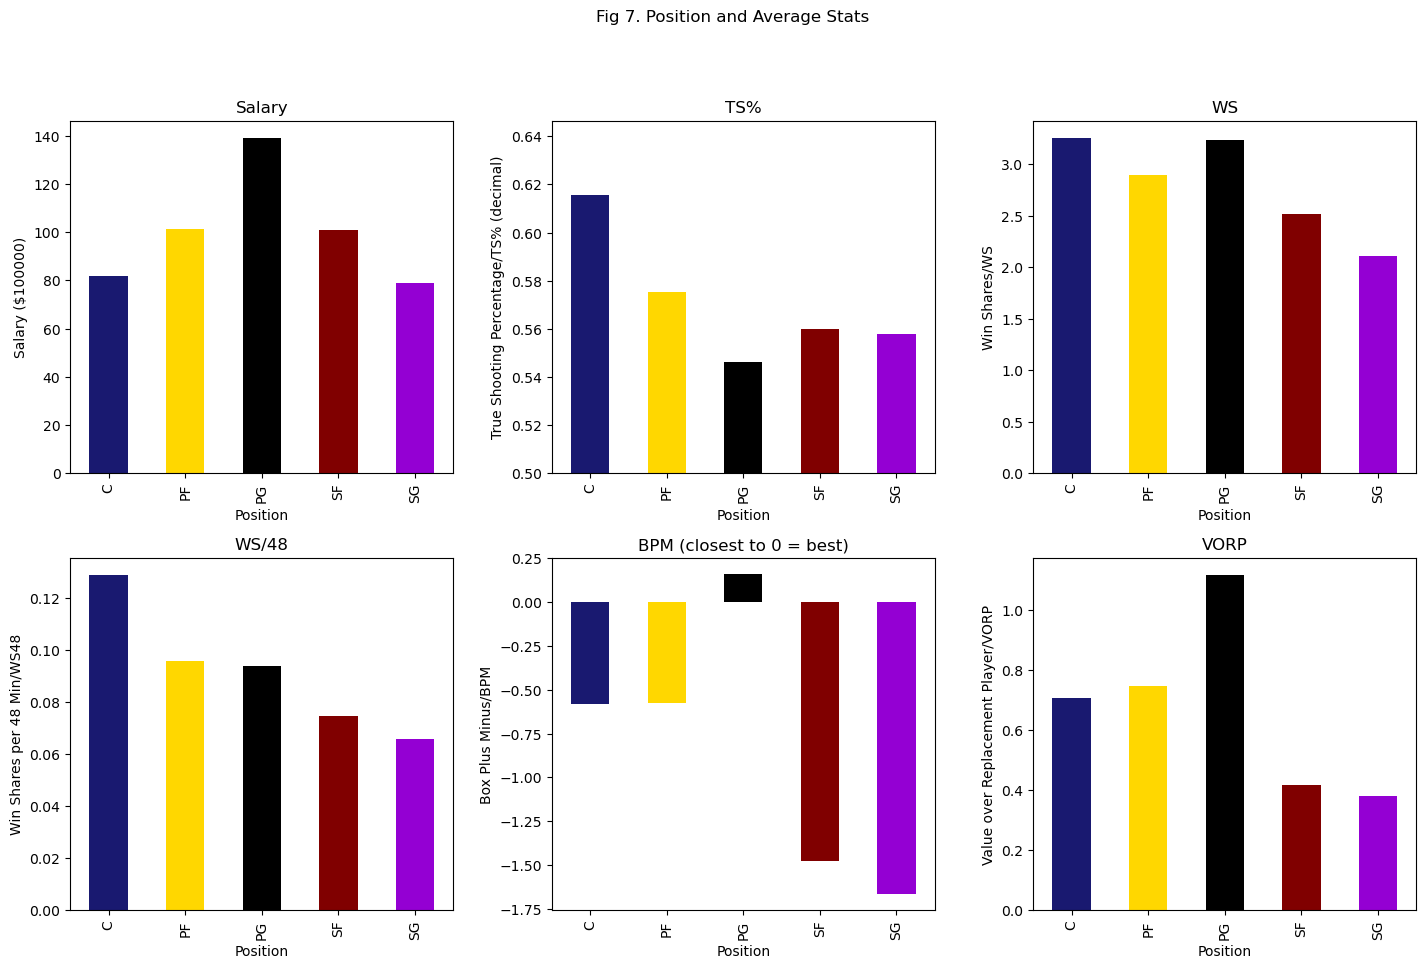

In [13]:
#Create 6 subplots, 1 for each stat
perf_fig, axes = plt.subplots(2,3, figsize=(15,10))
perf_fig.suptitle('Fig 7. Position and Average Stats')
perf_fig.tight_layout(pad=4.0)

#Create another list of colours for position
position_colours = ['midnightblue', 'gold', 'black', 'maroon', 'darkviolet']

#Salary
nba_ts_pos_plot = nba_position['Salary'].plot.bar(ax=axes[0,0], color=position_colours, title='Salary')
nba_ts_pos_plot.set_ylabel('Salary ($100000)')

#True Shooting Percentage
nba_ts_pos_plot = nba_position['TS%'].plot.bar(ax=axes[0,1], color=position_colours, title='TS%')
nba_ts_pos_plot.set_ylabel('True Shooting Percentage/TS% (decimal)')
nba_ts_pos_plot.set_ylim(0.5) #All shoot above 0.500, so set range so that y starts at 0.500

#Win Shares
nba_ws_pos_plot = nba_position['WS'].plot.bar(ax=axes[0,2], color=position_colours, title='WS')
nba_ws_pos_plot.set_ylabel('Win Shares/WS')

# Win Shares per 48 Min
nba_ws48_pos_plot = nba_position['WS/48'].plot.bar(ax=axes[1,0], color=position_colours, title='WS/48')
nba_ws48_pos_plot.set_ylabel('Win Shares per 48 Min/WS48')

#Box Plus Minus
nba_bpm_pos_plot = nba_position['BPM'].plot.bar(ax=axes[1,1], color=position_colours, title='BPM (closest to 0 = best)')
nba_bpm_pos_plot.set_ylabel('Box Plus Minus/BPM')

#Value over Replacement Player
nba_vorp_pos_plot = nba_position['VORP'].plot.bar(ax=axes[1,2], color=position_colours, title='VORP')
nba_vorp_pos_plot.set_ylabel('Value over Replacement Player/VORP')

#Set x axis to position for all subplots
for ax in axes.flat:
    #not having this throws a FixedFormatter warning. Also positions are in alphabetical order
    ax.set_xticks(range(len(['C','PF','PG','SF','SG'])))
    ax.set_xticklabels(['C','PF','PG','SF','SG'])

plt.show(perf_fig)


With Figure 7 being displayed, the coding part of this EDA is finished.

### Discussion

For this data analysis, I did an analysis on NBA players based on the 2022-23 season, so I can answer questions about salary, performance, team and position. For Question 1, based on figures 1 to 5, there was a positive correlation to salary and performance. In terms of how strong the correlation was based on this website from Boston University [6], Figures 1 and 3 had a weak correlation, Figure 2 had a strong correlation and Figures 4 and 5 had a strong correlation. This shows that BPM and value over a replacement player are both factors that impact the salary, but not efficient shooting. While doing the graphs, there were a bunch of outliers. Notably, Russell Westbrook and John Wall, both in the top 3 highest paid with Stephen Curry, were disappointing and performed worse than the mean in most cases. Not being a starter might be why, as both were sixth men in the majority of the games they played. Additionally, the other 2 of top 5 highest paid players (LeBron and KD) were not leaders in the performance statistics that I used, but were better than the average. 

For Question 2, based on Figure 6 and the standings [7], many teams that made it to at least the play-in game had the highest true shooting percentage, with the Los Angeles Lakers, the 7th seed in the Western Conference, having the highest with 61.8%. Philadelphia, Golden State, Sacramento and Dallas were also in the top 5 in TS% and all made the playoffs, with the Denver Nuggets winning it all. San Antonio, Charlotte and Houston, being at or near the bottom of their respective conferences, had some of the lowest. Atlanta, Memphis and Toronto are outliers here, since Toronto made the play-in and the other two got playoff spots. So, for this question, there was a positive correlation between shooting percentage and standings during the season, but it was not exactly a strong one.

Finally, based on the data for Question 3, Point Guards made the most money in the 2022-23 season, thanks to Stephen Curry, John Wall and Russell Westbrook. Point Guards also had the highest average value of a replacement player and BPM, due to the number of points they score. Shooting Guards and Small Forwards are the worst positions, with either of them placing in the bottom two of every graph and the mean value.  Centers, on the other hand, win in terms of performance besides VORP and BPM. In terms of statistics, everything but salary is at least the average median and they are above the mean of all of the performance statistics. With players like 2022-23 MVP Joel Embiid, Nikola Jokic and Domantas Sabonis, as well as other big men, like Giannis Antetokounmpo, the overall game has shifted in favour of centers and power forwards becoming the best positions. Even in the current 2023-24 season, two centers, Victor Wenbanyama and Chet Holmgren, are frontrunners for Rookie of the Year, which shows a stronger emphasis on taller and more agile centers in the current era of basketball. Considering that Wall is a free agent and Westbrook is a bench player, centers might also be the highest paid position as well in the near future. Therefore, based on this and the other two questions, if someone wants to have the highest chance of success in the NBA, there is still a scenario to follow, but it has changed to becoming a center playing for a playoff contender.

### References
#### Website References (IEEE)
[1] J. Welsh, “NBA player salaries (2022-23 season),” Kaggle, https://www.kaggle.com/datasets/jamiewelsh2/nba-player-salaries-2022-23-season (accessed Nov. 25, 2023).

[2] “Jaylen Brown agrees to supermax extension with Celtics,” NBA.com, https://www.nba.com/news/jaylen-brown-2023-supermax-extension (accessed Nov. 25, 2023). 

[3] “Basketball true shooting percentage: Wolfram Formula Repository,” Basketball True Shooting Percentage | Wolfram Formula Repository, https://resources.wolframcloud.com/FormulaRepository/resources/Basketball-True-Shooting-Percentage (accessed Nov. 25, 2023). 

[4] “NBA Win Shares,” Basketball Reference, https://www.basketball-reference.com/about/ws.html (accessed Nov. 25, 2023). 

[5] “About box plus/minus (BPM),” Basketball, https://www.basketball-reference.com/about/bpm2.html (accessed Nov. 25, 2023). 

[6] “PH717 module 9 - correlation and regression: The correlation coefficient (r),” Boston University, https://sphweb.bumc.bu.edu/otlt/MPH-Modules/PH717-QuantCore/PH717-Module9-Correlation-Regression/PH717-Module9-Correlation-Regression4.html (accessed Nov. 25, 2023).

[7] “NBA standings - 2022-23 regular season conference standings,” ESPN, https://www.espn.com/nba/standings/_/season/2023 (accessed Nov. 26, 2023). 

#### Python Library References and Documentation Websites
* pandas for reading the csv, as well as cleaning, manipulating and grouping the data, https://pandas.pydata.org/docs/reference/ 
* seaborn for data visualization, https://seaborn.pydata.org/api.html
* matplotlib for data visualization, https://matplotlib.org/stable/api/index.html